_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-04-29 09:15:54--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.136.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.136.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M   750KB/s    in 4m 10s  

2019-04-29 09:20:05 (802 KB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

x instacart_2017_05_01/
x instacart_2017_05_01/._aisles.csv
x instacart_2017_05_01/aisles.csv
x instacart_2017_05_01/._departments.csv
x instacart_2017_05_01/departments.csv
x instacart_2017_05_01/._order_products__prior.csv
x instacart_2017_05_01/order_products__prior.csv
x instacart_2017_05_01/._order_products__train.csv
x instacart_2017_05_01/order_products__train.csv
x instacart_2017_05_01/._orders.csv
x instacart_2017_05_01/orders.csv
x instacart_2017_05_01/._products.csv
x instacart_2017_05_01/products.csv


In [6]:
%cd instacart_2017_05_01

/Users/ridleyleisy/Documents/lambda/unit_one/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/module1-join-and-reshape-data/instacart_2017_05_01


In [7]:
!ls -lh *.csv

-rw-r--r--@ 1 ridleyleisy  staff   2.5K May  2  2017 aisles.csv
-rw-r--r--@ 1 ridleyleisy  staff   270B May  2  2017 departments.csv
-rw-r--r--@ 1 ridleyleisy  staff   551M May  2  2017 order_products__prior.csv
-rw-r--r--@ 1 ridleyleisy  staff    24M May  2  2017 order_products__train.csv
-rw-r--r--@ 1 ridleyleisy  staff   104M May  2  2017 orders.csv
-rw-r--r--@ 1 ridleyleisy  staff   2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [1]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [2]:
!ls -lh *.csv

ls: *.csv: No such file or directory


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [3]:
import pandas as pd

In [4]:
path = '/Users/ridleyleisy/Documents/lambda/unit_one/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/module1-join-and-reshape-data/instacart_2017_05_01/'

In [5]:
!head aisles.csv

head: aisles.csv: No such file or directory


In [6]:
!wc aisles.csv

wc: aisles.csv: open: No such file or directory


In [7]:
aisles = pd.read_csv(path + 'aisles.csv')

In [8]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


### departments

In [9]:
departments = pd.read_csv(path + 'departments.csv')

### order_products__prior

In [10]:
!head order_products__prior.csv

head: order_products__prior.csv: No such file or directory


In [11]:
prior_order = pd.read_csv(path + 'order_products__prior.csv')

In [12]:
prior_order

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [13]:
prior_order.groupby(['order_id'])['product_id'].count().mean()

10.088883421247614

### order_products__train

In [14]:
# no difference in train vs prior

In [15]:
train_order = pd.read_csv(path + 'order_products__train.csv')

### orders

In [16]:
orders = pd.read_csv(path + 'orders.csv')

In [17]:
orders.shape

(3421083, 7)

In [18]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [19]:
orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

### products

In [20]:
products = pd.read_csv(path + 'products.csv')

In [21]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Concatenate order_products__prior and order_products__train

In [22]:
order_products = pd.concat([train_order,prior_order])

In [23]:
order_products

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [24]:
subset = orders[(orders['user_id'] == 1) & (orders['order_number'] <= 2)][['user_id','order_id','order_number','order_dow','order_hour_of_day']]

In [25]:
subset

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [26]:
columns = ['order_id','add_to_cart_order','product_id']

In [27]:
order_products[columns].head()

,order_id,add_to_cart_order,product_id
0,1,1,49302
1,1,2,11109
2,1,3,10246
3,1,4,49683
4,1,5,43633


Merge with columns from `products`

In [28]:
merged = pd.merge(subset, order_products[columns],how='inner',on='order_id')

In [29]:
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [30]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [31]:
final = pd.merge(merged, products[['product_id','product_name']],how='inner',on='product_id')

In [32]:
final = final.sort_values(by=['order_id','add_to_cart_order'])

In [33]:
display(final)

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
10,1,2398795,2,3,7,6,13032,Cinnamon Toast Crunch
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn


# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [57]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [58]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [62]:
table1 = pd.melt(table1)

In [63]:
table1

,variable,value
0,treatmenta,NaN
1,treatmenta,16.0
2,treatmenta,3.0
3,treatmentb,2.0
4,treatmentb,11.0
5,treatmentb,1.0


## Table 2 --> Tidy

In [38]:
##### LEAVE BLANK --an assignment exercise #####

In [61]:
table2 = pd.melt(table2)

In [64]:
table2

,variable,value
0,John Smith,NaN
1,John Smith,2.0
2,Jane Doe,16.0
3,Jane Doe,11.0
4,Mary Johnson,3.0
5,Mary Johnson,1.0


## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [66]:
pd.pivot_table(table1,index='variable')

,value
variable,
treatmenta,9.500000
treatmentb,4.666667


## Tidy --> Table 2

In [39]:
##### LEAVE BLANK --an assignment exercise #####

In [68]:
pd.pivot_table(table2,index='variable')

,value
variable,
Jane Doe,13.5
John Smith,2.0
Mary Johnson,2.0


# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

In [47]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

NameError: name 'tidy' is not defined

## Now with Instacart data

In [40]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

FileNotFoundError: [Errno 2] File b'products.csv' does not exist: b'products.csv'

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [ ]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

## 4 ways to reshape and plot

### 1. value_counts

### 2. crosstab

### 3. Pivot Table

### 4. melt

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [53]:
display(example)

In [41]:
# lets first import products so we can pull product ids

In [42]:
products = pd.read_csv(path + 'products.csv')

In [43]:
# place products in question in a list

In [44]:
product_list = ['Banana','Bag of Organic Bananas','Organic Strawberries','Organic Baby Spinach',
           'Organic Hass Avocado','Organic Avocado','Large Lemon','Strawberries','Limes','Organic Whole Milk']

In [45]:
# grabbing product ids from product table and filter for our products in question

In [46]:
product_ids = products.loc[products['product_name'].isin(product_list)][['product_id','product_name']]

In [47]:
# merging product table with order products based on product_id

In [48]:
product_count = pd.merge(order_products,product_ids,how='inner',on='product_id')

In [49]:
# grouping by product_name and summing the order_id by unique values

In [50]:
product_count.groupby(['product_name'])['order_id'].nunique()

product_name
Bag of Organic Bananas    394930
Banana                    491291
Large Lemon               160792
Limes                     146660
Organic Avocado           184224
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Strawberries      275577
Organic Whole Milk        142813
Strawberries              149445
Name: order_id, dtype: int64

## Flights Data

In [69]:
import seaborn as sns

In [70]:
flights = sns.load_dataset('flights')

In [72]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [ ]:
# pivot table showing the number of passengers by month and year. Using year for the index and month for the columns

In [85]:
flights = pd.pivot_table(flights, index='year',columns='month')

In [86]:
flights

passengers                                                               \
month    January February March April  May June July August September October   
year                                                                            
1949         112      118   132   129  121  135  148    148       136     119   
1950         115      126   141   135  125  149  170    170       158     133   
1951         145      150   178   163  172  178  199    199       184     162   
1952         171      180   193   181  183  218  230    242       209     191   
1953         196      196   236   235  229  243  264    272       237     211   
1954         204      188   235   227  234  264  302    293       259     229   
1955         242      233   267   269  270  315  364    347       312     274   
1956         284      277   317   313  318  374  413    405       355     306   
1957         315      301   356   348  355  422  465    467       404     347   
1958         340      318   362   348  363  435  491    505       404     359   
1959         360      342   406   396  420  472  548    559       463     407   
1960         417      391   419   461  472  535  622    606       508     461   

                         
month November December  
year                     
1949       104      118  
1950       114      140  
1951       146      166  
1952       172      194  
1953       180      201  
1954       203      229  
1955       237      278  
1956       271      306  
1957       305      336  
1958       310      337  
1959       362      405  
1960       390      432

In [87]:
# 112 passengers for January 1949 and 432 passengers for December 1960 checks out!

In [88]:
flights.head()

passengers                                                               \
month    January February March April  May June July August September October   
year                                                                            
1949         112      118   132   129  121  135  148    148       136     119   
1950         115      126   141   135  125  149  170    170       158     133   
1951         145      150   178   163  172  178  199    199       184     162   
1952         171      180   193   181  183  218  230    242       209     191   
1953         196      196   236   235  229  243  264    272       237     211   

                         
month November December  
year                     
1949       104      118  
1950       114      140  
1951       146      166  
1952       172      194  
1953       180      201

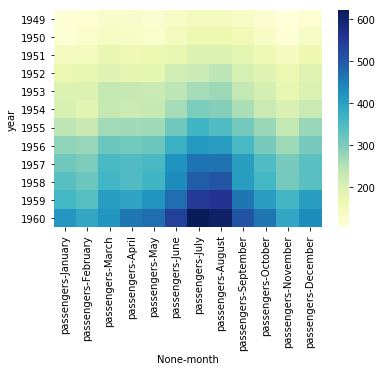

In [90]:
sns.heatmap(flights,cmap="YlGnBu")

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)